In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import scipy.stats as stats

In [2]:
# Data File
filepath = ('../Resources/flavors_of_cacao.csv')

# Read CSV
df = pd.read_csv(filepath)
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
# Rename columns
df.columns = [
    'company_maker',
    'specific_bean_origin_or_bar_name',
    'ref',
    'review_date',
    'cocoa_percent',
    'company_location',
    'rating',
    'bean_type',
    'broad_bean_origin'
]
print(df.columns)


Index(['company_maker', 'specific_bean_origin_or_bar_name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad_bean_origin'],
      dtype='object')


In [5]:
df.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
df2 = df.drop(columns=['bean_type'])
df2.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [7]:
df_cleaned = df2.dropna()
df_cleaned.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [9]:
# Renamed spelling errors in company location column
df_cleaned.loc[:, 'company_location'] = df_cleaned['company_location'].replace({
    'Dominican Republic': 'Dominican Republic',
    'Niacragua': 'Nicaragua'
})

In [19]:
# Renamed spelling errors and blended countries in broad bean origin column
df_cleaned['broad_bean_origin'].fillna('')

df_cleaned.loc[:, 'broad_bean_origin'] = df_cleaned['broad_bean_origin'].replace({
    '': 'Unknown Countries', #I can't get the empty cells to rename
    'Africa, Carribean, C. Am.': 'Blended Countries',
    'Carribean(DR/Jam/Tri)': 'Blended Countries',
    'Carribean': 'Blended Countries',
    'Central and S. America': 'Blended Countries',
    'Colombia, Ecuador': 'Blended Countries',
    'Cost Rica, Ven': 'Blended Countries',
    'Dom. Rep., Madagascar': 'Blended Countries',
    'Dominican Rep., Bali': 'Blended Countries',
    'Domincan Republic': 'Dominican Republic',
    'DR, Ecuador, Peru': 'Blended Countries',
    'Ecuador, Costa Rica': 'Blended Countries',
    'Ecuador, Mad., PNG': 'Blended Countries',
    'Ghana & Madagascar': 'Blended Countries',
    'Ghana, Domin. Rep': 'Blended Countries',
    'Ghana, Panama, Ecuador': 'Blended Countries',
    'Gre., PNG, Haw., Haiti, Mad': 'Blended Countries',
    'Guat., D.R., Peru, Mad., PNG': 'Blended Countries',
    'Indonesia, Ghana': 'Blended Countries',
    'Mad., Java, PNG': 'Blended Countries',
    'Madagascar & Ecuador': 'Blended Countries',
    'Peru, Belize': 'Blended Countries',
    'Peru, Dom. Rep': 'Blended Countries',
    'Peru, Ecuador': 'Blended Countries',
    'Peru, Ecuador, Venezuela': 'Blended Countries',
    'Peru, Mad., Dom. Rep.': 'Blended Countries',
    'Peru, Madagascar': 'Blended Countries',
    'Peru(SMartin,Pangoa,nacional)': 'Blended Countries',
    'PNG, Vanuatu, Mad': 'Blended Countries',
    'Sao Tome & Principe': 'Blended Countries',
    'South America': 'Blended Countries',
    'South America, Africa': 'Blended Countries',
    'Trinidad-Tobago': 'Blended Countries',
    'Trinidad, Ecuador': 'Blended Countries',
    'Trinidad, Tobago': 'Blended Countries',
    'Ven, Bolivia, D.R.': 'Blended Countries',
    'Ven, Trinidad, Ecuador': 'Blended Countries',
    'Ven., Indonesia, Ecuad.': 'Blended Countries',
    'Ven., Trinidad, Mad.': 'Blended Countries',
    'Ven.,Ecu.,Peru,Nic.': 'Blended Countries',
    'Venez,Africa,Brasil,Peru,Mex': 'Blended Countries',
    'Venezuela, Carribean': 'Blended Countries',
    'Venezuela, Dom. Rep.': 'Blended Countries',
    'Venezuela, Ghana': 'Blended Countries',
    'Venezuela, Java': 'Blended Countries',
    'Venezuela, Trinidad': 'Blended Countries',
    'Venezuela/ Ghana': 'Blended Countries',
    'Blended': 'Blended Countries'
})

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1794 non-null   object 
 1   specific_bean_origin_or_bar_name  1794 non-null   object 
 2   ref                               1794 non-null   int64  
 3   review_date                       1794 non-null   int64  
 4   cocoa_percent                     1794 non-null   object 
 5   company_location                  1794 non-null   object 
 6   rating                            1794 non-null   float64
 7   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 126.1+ KB


In [12]:
df_cleaned.to_csv('../Resources/updated_flavors_of_cacao.csv')

In [13]:
df_cleaned['broad_bean_origin'].value_counts()

broad_bean_origin
Venezuela             214
Ecuador               193
Dominican Republic    166
Peru                  165
Madagascar            145
                       73
Blended Countries      67
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Costa Rica             38
Vietnam                38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30
Hawaii                 28
Guatemala              28
Jamaica                20
Grenada                19
Indonesia              16
Honduras               15
Cuba                   11
Congo                  10
Sao Tome               10
Haiti                   9
Fiji                    8
St. Lucia               8
Uganda                  8
Panama                  7
Vanuatu                 7
West Africa             6
Philippines             5
Ivory Coast             5
Solomon Islands     

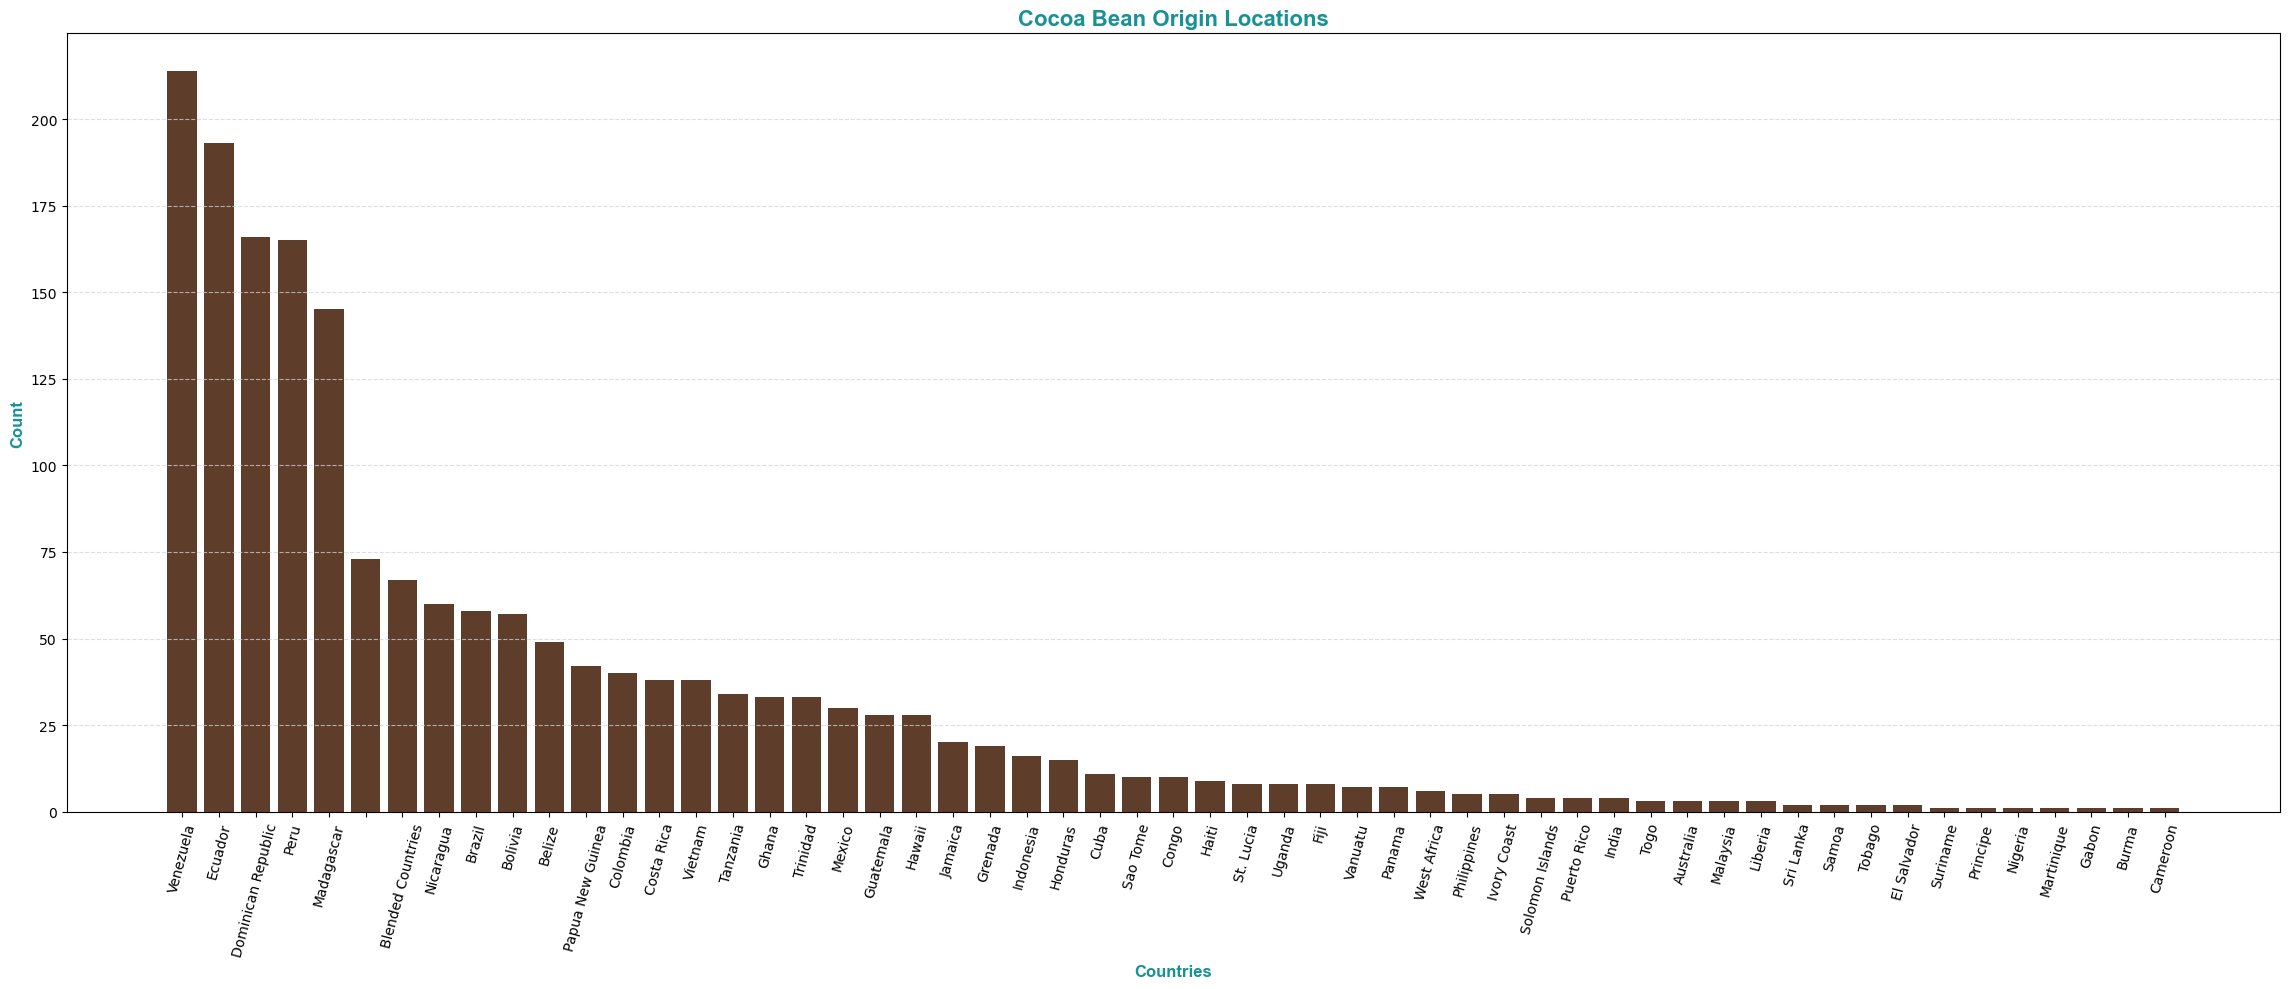

In [14]:
# Data
data = df_cleaned.groupby("broad_bean_origin").size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(23, 10))

# Create a basic plot
plt.bar(data.index, data.values, color="#5E3D2B", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Countries", fontfamily="Arial", fontsize=12, color='#199296', weight='bold')
plt.xticks(rotation=75)
plt.ylabel("Count", fontfamily="Arial", fontsize=12, color='#199296', weight='bold')
plt.title("Cocoa Bean Origin Locations", fontweight="bold", fontsize=16, fontfamily="Arial", color='#199296')
plt.tight_layout()

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [15]:
# We need to shorten the amount of countries
top_10_countries = df_cleaned['broad_bean_origin'].value_counts().head(10).reset_index()
top_10_countries.columns = ['broad_bean_origin', 'count']

top_10_countries.head(10)

,broad_bean_origin,count
0,Venezuela,214
1,Ecuador,193
2,Dominican Republic,166
3,Peru,165
4,Madagascar,145
5,,73
6,Blended Countries,67
7,Nicaragua,60
8,Brazil,58
9,Bolivia,57


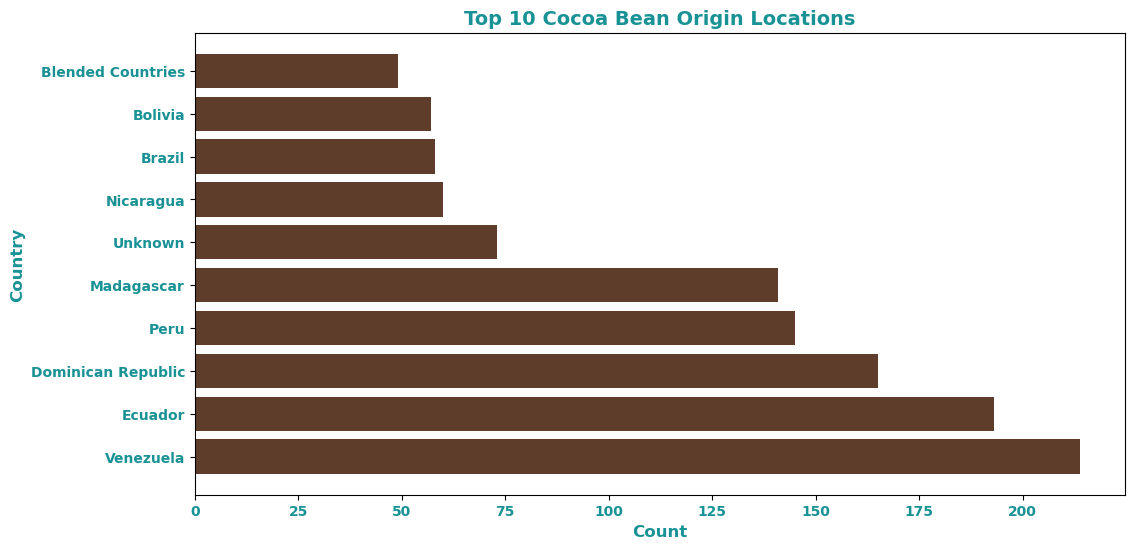

In [16]:
# Data
top_10_countries = pd.DataFrame({
    'broad_bean_origin': ['Venezuela', 'Ecuador', 'Dominican Republic', 'Peru', 'Madagascar', None, 'Nicaragua', 'Brazil', 'Bolivia', 'Blended Countries'],
    'count': [214, 193, 165, 145, 141, 73, 60, 58, 57, 49]
}) 

# Replace empty or NaN values in 'broad_bean_origin' column with "Unknown"
top_10_countries['broad_bean_origin'] = top_10_countries['broad_bean_origin'].replace(['', None], 'Unknown')

# Plot
plt.figure(figsize=(12, 6))

# Use horizontal bars
plt.barh(top_10_countries['broad_bean_origin'], top_10_countries['count'], color='#5E3D2B')

# Title and labels
plt.title('Top 10 Cocoa Bean Origin Locations', fontsize=14, color='#199296', weight='bold')
plt.xlabel('Count', fontsize=12, color='#199296', weight='bold')
plt.ylabel('Country', fontsize=12, color='#199296', weight='bold')

# Ticks styling
plt.xticks(color='#199296', weight='bold')
plt.yticks(color='#199296', weight='bold')

# Show the plot
plt.show()

In [17]:
# Top 10 company locations
top_10_company = (df_cleaned['company_location'].value_counts()).iloc[:10]
top_10_company.columns = ['company_location', 'count']

top_10_company.head(10) 

company_location
U.S.A.         763
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: count, dtype: int64

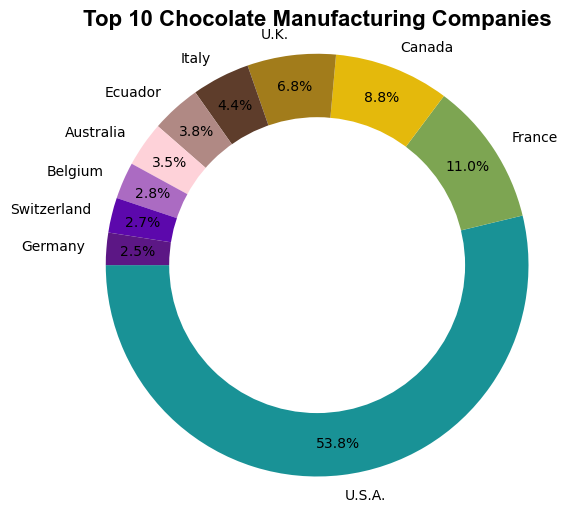

In [18]:
# Create data to be used for donut chart

# Create a custom gradient colormap
cmap = LinearSegmentedColormap.from_list("gradient", ["#199296", "#E4B90C", "#5E3D2B", "#FED2D9", "#5C08AC", "#5C265F"])

# Create figure with adjusted size
plt.figure(figsize=(6, 6))

# Create the pie chart
wedges, texts, autotexts = plt.pie(top_10_company.values, labels=top_10_company.index, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)

# Apply the gradient to each wedge
for i, wedge in enumerate(wedges):
    # The gradient color for each wedge is determined by its position in the data (i.e., index)
    wedge.set_facecolor(cmap(i / len(wedges)))  # Apply gradient color

# DONUT: Create the white center circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Add title
plt.title("Top 10 Chocolate Manufacturing Companies", fontweight="bold", fontsize=16, fontfamily="Arial")

# Ensure the plot is circular
plt.axis("equal")

# Show the plot
plt.show()